In [1]:
##Agustin Hejeij
##Padron 102324

import pandas as pd
import seaborn as sns
import datetime
import folium
import matplotlib.pyplot as plt
from wordcloud import WordCloud

df = pd.read_csv('Entrenamieto_ECI_2020.csv', encoding='utf-8')

In [2]:
reduced = df.loc[:, ['Opportunity_ID', 'Opportunity_Created_Date', 'ASP_Currency','ASP', 'ASP_(converted)','ASP_(converted)_Currency']].loc[df['ASP_Currency']=='JPY']
display(reduced)
display(reduced['Opportunity_ID'].nunique())
display(reduced['ASP'].count())

asd = reduced.dropna().groupby('Opportunity_ID').agg({'ASP':['count', 'nunique']})
asd.columns = ['cant', 'dist']
display(asd)
mul = asd[asd['dist'] > 1]
mul

,Opportunity_ID,Opportunity_Created_Date,ASP_Currency,ASP,ASP_(converted),ASP_(converted)_Currency
8,8,12/9/2015,JPY,NaN,NaN,USD
9,8,12/9/2015,JPY,NaN,NaN,USD
10,8,12/9/2015,JPY,NaN,NaN,USD
11,8,12/9/2015,JPY,NaN,NaN,USD
12,8,12/9/2015,JPY,78.0,0.70125,USD
...,...,...,...,...,...,...
16919,12784,12/2/2015,JPY,78.0,0.70125,USD
16923,12786,12/2/2015,JPY,67.0,0.60236,USD
16924,12787,12/2/2015,JPY,67.0,0.60236,USD
16925,12788,12/2/2015,JPY,71.0,0.63832,USD


1604

1786

,cant,dist
Opportunity_ID,,
8,1,1
9,1,1
10,1,1
13,1,1
14,1,1
...,...,...
12784,1,1
12786,1,1
12787,1,1


,cant,dist
Opportunity_ID,,
411,2,2
1220,2,2
2355,3,2
3391,2,2
3809,2,2
7173,3,2
10613,2,2


In [3]:
joined = df.merge(mul, on='Opportunity_ID')
joined.loc[:, ['Opportunity_ID', 'Opportunity_Created_Date', 'ASP_Currency','ASP', 'ASP_(converted)','ASP_(converted)_Currency','Planned_Delivery_Start_Date']]

,Opportunity_ID,Opportunity_Created_Date,ASP_Currency,ASP,ASP_(converted),ASP_(converted)_Currency,Planned_Delivery_Start_Date
0,411,1/13/2017,JPY,58.0,0.52144,USD,3/1/2017
1,411,1/13/2017,JPY,55.0,0.49447,USD,3/1/2017
2,1220,2/16/2016,JPY,71.0,0.63832,USD,3/15/2016
3,1220,2/16/2016,JPY,73.0,0.65630,USD,3/15/2016
4,2355,8/26/2016,JPY,60.0,0.53942,USD,9/30/2016
5,2355,8/26/2016,JPY,55.0,0.49447,USD,9/30/2016
6,2355,8/26/2016,JPY,60.0,0.53942,USD,9/30/2016
7,3391,12/12/2016,JPY,51.0,0.45851,USD,4/1/2017
8,3391,12/12/2016,JPY,53.0,0.47649,USD,4/1/2017
9,3809,3/30/2017,JPY,51.0,0.45851,USD,6/5/2017


In [4]:
##aaa = df.groupby(['Planned_Delivery_Start_Date','ASP_Currency']).agg({'ASP':'mean', 'ASP_(converted)':'mean'})
aaa = df.groupby(['Opportunity_Created_Date','ASP_Currency']).agg({'ASP':'mean', 'ASP_(converted)':'mean'})
b = aaa.reset_index()
b.columns = ['Opportunity_Created_Date', 'ASP_Currency', 'ASP_mean', 'ASP_(converted)_mean']
b['coef']=b['ASP_(converted)_mean']/b['ASP_mean']
final = b.drop(columns=['ASP_mean', 'ASP_(converted)_mean'])
final = final.loc[final['ASP_Currency']!='USD']
final

,Opportunity_Created_Date,ASP_Currency,coef
1,1/10/2017,EUR,1.131096
2,1/10/2017,JPY,0.008990
4,1/10/2018,AUD,0.707614
5,1/10/2018,EUR,1.131091
6,1/10/2018,JPY,0.008990
...,...,...,...
2348,9/8/2017,EUR,1.131099
2349,9/8/2017,JPY,0.008990
2352,9/9/2015,EUR,1.131091
2353,9/9/2015,JPY,0.008990


In [5]:
new = df.merge(final, on=['Opportunity_Created_Date','ASP_Currency'])
new[new['Opportunity_Created_Date']=='12/9/2015'].loc[:, ['Opportunity_ID', 'Opportunity_Created_Date', 'ASP_Currency','ASP', 'ASP_(converted)','ASP_(converted)_Currency','coef','Last_Modified_Date']]

,Opportunity_ID,Opportunity_Created_Date,ASP_Currency,ASP,ASP_(converted),ASP_(converted)_Currency,coef,Last_Modified_Date
2,8,12/9/2015,JPY,NaN,NaN,USD,0.008990,4/5/2016
3,8,12/9/2015,JPY,NaN,NaN,USD,0.008990,4/5/2016
4,8,12/9/2015,JPY,NaN,NaN,USD,0.008990,4/5/2016
5,8,12/9/2015,JPY,NaN,NaN,USD,0.008990,4/5/2016
6,8,12/9/2015,JPY,78.00,0.70125,USD,0.008990,4/5/2016
7,9,12/9/2015,JPY,NaN,NaN,USD,0.008990,4/5/2016
8,9,12/9/2015,JPY,NaN,NaN,USD,0.008990,4/5/2016
9,9,12/9/2015,JPY,NaN,NaN,USD,0.008990,4/5/2016
10,9,12/9/2015,JPY,NaN,NaN,USD,0.008990,4/5/2016
11,9,12/9/2015,JPY,78.00,0.70125,USD,0.008990,4/5/2016


In [6]:
c = df.groupby('Opportunity_ID').agg({'Stage':'nunique'})
c = c.reset_index()

In [7]:
n = df[df.Stage=='Closed Won']
display(n.Territory.count())##value_counts().sum()
n = n[n.Region!='None']
display(n.Territory.count())
display(df.ID.count())

9533

9533

16947

In [8]:
df.Opportunity_ID.nunique()

9841

In [9]:
df[df.Territory!='None'].Territory.count()

11948

In [10]:
##qwe = df.groupby(['Opportunity_ID', 'Territory']).agg({'TRF':'nunique'}).reset_index()##.drop(columns='ASP')
qwe = df.groupby('Territory').agg({'TRF':'sum'}).reset_index()
qwe.Territory.value_counts().head(80)
##display(qwe.Opportunity_ID.nunique())
##qwe[qwe.Territory != 'None'].Territory.count()
##df[df.Region == 'EMEA'].Territory.value_counts()
##df.Region.value_counts()

#qwe = pd.read_csv('wn.csv')
##qwe['Territory'] = pd.to_str(qwe.Territory)
##qwe.dtypes

NW America     1
Belarus        1
Egypt          1
New Zealand    1
Carribean      1
              ..
India          1
Turkey         1
Malaysia       1
South Korea    1
Burma          1
Name: Territory, Length: 76, dtype: int64

In [11]:
difer = df.Territory != df.Billing_Country
difer.value_counts()
h = df[difer].loc[:,['ID', 'Region', 'Territory', 'Billing_Country', 'Opportunity_ID']]
h[h.Region == 'EMEA']

,ID,Region,Territory,Billing_Country,Opportunity_ID
0,27761,EMEA,None,Netherlands,0
1,27760,EMEA,None,Netherlands,1
78,4904,EMEA,UAE (Dubai),United Arab Emirates,30
135,19268,EMEA,None,Belgium,51
180,23924,EMEA,None,Netherlands,90
...,...,...,...,...,...
16862,19024,EMEA,France,Germany,12770
16863,19021,EMEA,France,Germany,12771
16927,23920,EMEA,None,Netherlands,12790
16931,17804,EMEA,United Kingdom,Germany,12794


In [12]:
df.Product_Type.value_counts()

None              15935
Other               515
Product_Type_3      179
Product_Type_1      142
Product_Type_0       94
Product_Type_4       73
Product_Type_2        9
Name: Product_Type, dtype: int64

In [13]:
df.Size.value_counts()

None      15967
Other       394
Size_3      356
Size_4      196
Size_1       25
Size_0        7
Size_2        2
Name: Size, dtype: int64

In [14]:
df.Product_Category_B.value_counts()

None                     15928
Other                      523
Product_Category_B_2        59
Product_Category_B_12       51
Product_Category_B_7        47
Product_Category_B_4        37
Product_Category_B_5        36
Product_Category_B_17       27
Product_Category_B_1        24
Product_Category_B_3        23
Product_Category_B_8        23
Product_Category_B_19       22
Product_Category_B_11       21
Product_Category_B_13       18
Product_Category_B_9        17
Product_Category_B_16       17
Product_Category_B_24       16
Product_Category_B_20        9
Product_Category_B_6         9
Product_Category_B_15        8
Product_Category_B_21        8
Product_Category_B_23        5
Product_Category_B_14        4
Product_Category_B_26        4
Product_Category_B_10        3
Product_Category_B_27        3
Product_Category_B_0         3
Product_Category_B_22        2
Name: Product_Category_B, dtype: int64

In [15]:
df.Quote_Expiry_Date.value_counts()
##df.Opportunity_ID.nunique()

NaT           4625
6/30/2017      436
3/31/2017      363
9/30/2017      225
12/31/2016     200
              ... 
3/14/2017        1
12/3/2017        1
3/7/2015         1
9/9/2018         1
2/18/2016        1
Name: Quote_Expiry_Date, Length: 1003, dtype: int64

In [16]:
df.groupby(['Pricing, Delivery_Terms_Quote_Appr', 'Pricing, Delivery_Terms_Approved']).agg({'Stage':'value_counts'})

Stage
Pricing, Delivery_Terms_Quote_Appr Pricing, Delivery_Terms_Approved Stage               
0                                  0                                Closed Won      2118
                                                                    Closed Lost     1136
1                                  0                                Closed Lost     2771
                                                                    Closed Won      1011
                                                                    Qualification     11
                                                                    Proposal           9
                                                                    Negotiation        1
                                   1                                Closed Won      6404
                                                                    Closed Lost     3443
                                                                    Proposal          26
                                                                    Negotiation       17

In [17]:
df.dtypes
df.groupby(['Bureaucratic_Code_0_Approval','Bureaucratic_Code_0_Approved']).agg({'Stage':'value_counts'})

Stage
Bureaucratic_Code_0_Approval Bureaucratic_Code_0_Approved Stage               
0                            0                            Closed Won      5928
                                                          Closed Lost     2961
1                            0                            Closed Lost     1846
                                                          Closed Won       787
                                                          Qualification     11
                                                          Proposal           9
                                                          Negotiation        1
                             1                            Closed Won      2818
                                                          Closed Lost     2543
                                                          Proposal          26
                                                          Negotiation       17

In [18]:
df['Total_Amount_Sum'] = df.groupby('Opportunity_ID')['Total_Amount'].transform('sum')
df[abs(df.Total_Amount_Sum - df.Total_Taxable_Amount)>1].loc[:,['Opportunity_ID', 'Total_Amount_Sum', 'Total_Taxable_Amount']]

,Opportunity_ID,Total_Amount_Sum,Total_Taxable_Amount
70,27,317625.00,420750.0
71,27,317625.00,420750.0
72,27,317625.00,420750.0
132,47,629145.00,0.0
186,96,1332347.50,0.0
...,...,...,...
16858,12767,9009950.00,4055000.0
16859,12767,9009950.00,4055000.0
16861,12769,111650.00,0.0
16945,12802,2346796.88,0.0


In [19]:
##df[abs(df.Total_Amount_Sum - df.Total_Taxable_Amount)>1].loc[df.Total_Amount_Sum > df.Total_Taxable_Amount]
df[abs(df.Total_Amount_Sum - df.Total_Taxable_Amount)>1000].loc[df.Total_Amount_Sum < df.Total_Taxable_Amount].loc[:,['Opportunity_ID','Total_Amount_Sum', 'Total_Taxable_Amount']]

,Opportunity_ID,Total_Amount_Sum,Total_Taxable_Amount
70,27,317625.00,4.207500e+05
71,27,317625.00,4.207500e+05
72,27,317625.00,4.207500e+05
1594,938,12432.00,1.406176e+04
2200,1248,12194000.00,1.356339e+09
3579,2001,776081.25,9.043541e+05
4805,2849,4968.60,5.526570e+05
6178,3811,71456.25,8.641875e+04
6179,3811,71456.25,8.641875e+04
6327,3914,539956.80,6.005940e+07


In [20]:
df[df.Opportunity_ID==623]

,ID,Region,Territory,"Pricing, Delivery_Terms_Quote_Appr","Pricing, Delivery_Terms_Approved",Bureaucratic_Code_0_Approval,Bureaucratic_Code_0_Approved,Submitted_for_Approval,Bureaucratic_Code,Account_Created_Date,...,Delivery_Year,Actual_Delivery_Date,TRF,Total_Amount_Currency,Total_Amount,Total_Taxable_Amount_Currency,Total_Taxable_Amount,Stage,Prod_Category_A,Total_Amount_Sum
1138,7112,APAC,Thailand,0,0,0,0,0,Bureaucratic_Code_4,2/2/2017,...,2017,NaT,0,USD,51408.0,USD,51512.4,Closed Won,Prod_Category_A_None,51408.0


In [21]:
df.dtypes

ID                                      int64
Region                                 object
Territory                              object
Pricing, Delivery_Terms_Quote_Appr      int64
Pricing, Delivery_Terms_Approved        int64
Bureaucratic_Code_0_Approval            int64
Bureaucratic_Code_0_Approved            int64
Submitted_for_Approval                  int64
Bureaucratic_Code                      object
Account_Created_Date                   object
Source                                 object
Billing_Country                        object
Account_Name                           object
Opportunity_Name                       object
Opportunity_ID                          int64
Sales_Contract_No                      object
Account_Owner                          object
Opportunity_Owner                      object
Account_Type                           object
Opportunity_Type                       object
Quote_Type                             object
Delivery_Terms                    

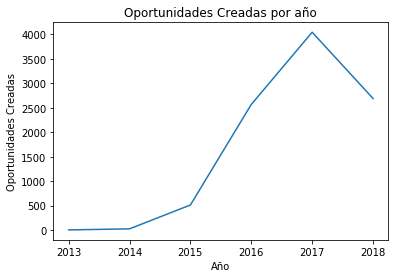

In [22]:
df.Opportunity_Created_Date = pd.to_datetime(df.Opportunity_Created_Date, errors='coerce')
df['Year_Created'] = df.Opportunity_Created_Date.dt.year
opp_per_year = df.groupby('Year_Created').agg({'Opportunity_ID':'nunique'}).reset_index()
opp_per_year.columns = ['Year', 'Opportunities_Created']

plt.plot(opp_per_year.Year, opp_per_year.Opportunities_Created)
plt.title('Oportunidades Creadas por año')
plt.xlabel('Año')
plt.ylabel('Oportunidades Creadas')
plt.show()

In [23]:
opp_per_reg_year = df.groupby(['Year_Created', 'Region']).agg({'Opportunity_ID':'nunique'})
opp_per_reg_year = opp_per_reg_year.unstack().fillna(0).reset_index()
opp_per_reg_year

Year_Created Opportunity_ID                                    
Region                        APAC Americas    EMEA  Japan Middle East
0              2013            0.0      0.0     1.0    0.0         0.0
1              2014            8.0     11.0     4.0    0.0         0.0
2              2015           56.0    166.0   163.0  126.0         0.0
3              2016          535.0    524.0   849.0  646.0        15.0
4              2017          959.0   1075.0  1231.0  714.0        67.0
5              2018          528.0    683.0   993.0  420.0        67.0

In [24]:
opp_per_reg_year.columns=['Year', 'APAC', 'Americas', 'EMEA', 'Japan', 'Middle East']
opp_per_reg_year

,Year,APAC,Americas,EMEA,Japan,Middle East
0,2013,0.0,0.0,1.0,0.0,0.0
1,2014,8.0,11.0,4.0,0.0,0.0
2,2015,56.0,166.0,163.0,126.0,0.0
3,2016,535.0,524.0,849.0,646.0,15.0
4,2017,959.0,1075.0,1231.0,714.0,67.0
5,2018,528.0,683.0,993.0,420.0,67.0


In [25]:
opp_per_reg_year.EMEA = opp_per_reg_year.EMEA + opp_per_reg_year['Middle East']
opp_per_reg_year.drop(columns='Middle East')

,Year,APAC,Americas,EMEA,Japan
0,2013,0.0,0.0,1.0,0.0
1,2014,8.0,11.0,4.0,0.0
2,2015,56.0,166.0,163.0,126.0
3,2016,535.0,524.0,864.0,646.0
4,2017,959.0,1075.0,1298.0,714.0
5,2018,528.0,683.0,1060.0,420.0


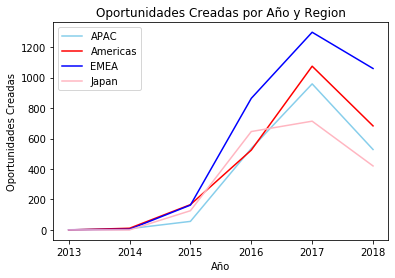

In [26]:
plt.plot(opp_per_reg_year.Year, opp_per_reg_year.APAC, label='APAC', color = 'skyblue')
plt.plot(opp_per_reg_year.Year, opp_per_reg_year.Americas, label='Americas', color='Red')
plt.plot(opp_per_reg_year.Year, opp_per_reg_year.EMEA, label='EMEA', color='blue')
plt.plot(opp_per_reg_year.Year, opp_per_reg_year.Japan, label='Japan', color='lightpink')
plt.title('Oportunidades Creadas por Año y Region')
plt.xlabel('Año')
plt.ylabel('Oportunidades Creadas')
plt.legend()
plt.show()

In [27]:
#df.groupby(['Opportunity_Created_Date'])
k = df.groupby('Opportunity_ID').agg({'ASP':'nunique'})
k[k.ASP>1]

k = df['ASP_(converted)']/df.ASP
k[8]

nan

In [28]:
k = df.drop_duplicates(subset = 'Opportunity_ID')
k.loc[:, ['Opportunity_ID', 'ASP', 'ASP_(converted)']].head(15)

,Opportunity_ID,ASP,ASP_(converted)
0,0,5.200000e-01,0.58817
1,1,5.300000e-01,0.59948
2,2,4.800000e-01,0.48000
3,3,5.300000e-01,0.53000
4,4,5.300000e-01,0.53000
5,5,5.300000e-01,0.53000
6,6,3.800000e-01,0.38000
7,7,4.800000e-01,0.48000
8,8,-9.223372e+18,NaN
13,9,-9.223372e+18,NaN


In [29]:
df.Opportunity_ID.nunique()
df['Conversion_Rate'] = (df['ASP_(converted)']/df.ASP)
df['Conversion_Rate_Def'] = df.groupby('Opportunity_ID')['Conversion_Rate'].transform('mean')
df.loc[:,['ASP_Currency', 'ASP', 'ASP_(converted)_Currency', 'ASP_(converted)', 'Conversion_Rate_Def']]
df['Total_Taxable_Amount_Converted'] = df.Total_Taxable_Amount * df.Conversion_Rate_Def
df

,ID,Region,Territory,"Pricing, Delivery_Terms_Quote_Appr","Pricing, Delivery_Terms_Approved",Bureaucratic_Code_0_Approval,Bureaucratic_Code_0_Approved,Submitted_for_Approval,Bureaucratic_Code,Account_Created_Date,...,Total_Amount,Total_Taxable_Amount_Currency,Total_Taxable_Amount,Stage,Prod_Category_A,Total_Amount_Sum,Year_Created,Conversion_Rate,Conversion_Rate_Def,Total_Taxable_Amount_Converted
0,27761,EMEA,None,1,1,1,1,0,Bureaucratic_Code_4,6/16/2015,...,5272800.00,EUR,5272800.0,Closed Lost,Prod_Category_A_None,5272800.00,2015,1.131096,1.131096,5.964044e+06
1,27760,EMEA,None,0,0,0,0,0,Bureaucratic_Code_4,6/16/2015,...,48230.00,EUR,48230.0,Closed Won,Prod_Category_A_None,48230.00,2015,1.131094,1.131094,5.455268e+04
2,27446,Americas,NW America,0,0,0,0,0,Bureaucratic_Code_4,4/21/2015,...,83865.60,USD,83865.6,Closed Won,Prod_Category_A_None,83865.60,2015,1.000000,1.000000,8.386560e+04
3,16808,Americas,NW America,1,0,1,0,0,Bureaucratic_Code_5,7/27/2013,...,7421881.50,USD,7421881.5,Closed Lost,Prod_Category_A_None,7421881.50,2015,1.000000,1.000000,7.421882e+06
4,16805,Americas,NW America,1,0,1,0,0,Bureaucratic_Code_5,7/27/2013,...,13357192.50,USD,13357192.5,Closed Lost,Prod_Category_A_None,13357192.50,2015,1.000000,1.000000,1.335719e+07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16942,8781,EMEA,Austria,1,1,1,1,0,Bureaucratic_Code_4,1/15/2016,...,103350.00,EUR,299715.0,Closed Won,Prod_Category_A_None,299715.00,2015,1.131096,1.131096,3.390065e+05
16943,8786,EMEA,Austria,1,1,1,1,0,Bureaucratic_Code_4,1/15/2016,...,93015.00,EUR,299715.0,Closed Won,Prod_Category_A_None,299715.00,2015,1.131096,1.131096,3.390065e+05
16944,8792,EMEA,Austria,1,1,1,1,0,Bureaucratic_Code_4,1/15/2016,...,103350.00,EUR,299715.0,Closed Won,Prod_Category_A_None,299715.00,2015,1.131096,1.131096,3.390065e+05
16945,28561,Americas,NE America,1,1,1,1,0,Bureaucratic_Code_4,10/20/2015,...,2346796.88,USD,0.0,Closed Lost,Prod_Category_A_None,2346796.88,2015,1.000000,1.000000,0.000000e+00


In [30]:
df.dtypes

ID                                             int64
Region                                        object
Territory                                     object
Pricing, Delivery_Terms_Quote_Appr             int64
Pricing, Delivery_Terms_Approved               int64
Bureaucratic_Code_0_Approval                   int64
Bureaucratic_Code_0_Approved                   int64
Submitted_for_Approval                         int64
Bureaucratic_Code                             object
Account_Created_Date                          object
Source                                        object
Billing_Country                               object
Account_Name                                  object
Opportunity_Name                              object
Opportunity_ID                                 int64
Sales_Contract_No                             object
Account_Owner                                 object
Opportunity_Owner                             object
Account_Type                                  

In [31]:
display(df.loc[df.Stage=='Closed Won'].Delivery_Quarter.value_counts())
display(df.loc[df.Stage=='Closed Won'].Delivery_Year.value_counts())
display(df.Opportunity_ID.nunique())

df.Month = pd.to_datetime(df.Month, errors='coerce')
df['Delivery_Month']=df.Month.dt.month

hmp = df.groupby(['Delivery_Month', 'Delivery_Year']).agg({'Opportunity_ID':'nunique'}).unstack(0)
hmp = hmp.fillna(0)
hmp.columns = ['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio', 'Julio', 'Agosto', 'Septiembre', 'Octubre', 'Noviembre', 'Diciembre']
#hmp.Opportunities.sum()
hmp = hmp.stack().unstack(0).loc[:, [2016,2017,2018]]

Q4    2603
Q2    2518
Q3    2218
Q1    2194
Name: Delivery_Quarter, dtype: int64

2017    4095
2018    3196
2016    2137
2019     105
Name: Delivery_Year, dtype: int64

9841

In [32]:
test = df.groupby('Opportunity_ID').agg({'Delivery_Quarter':'nunique', 'Delivery_Year':'nunique'})
test[(test.Delivery_Quarter>1) | (test.Delivery_Year>1)]

,Delivery_Quarter,Delivery_Year
Opportunity_ID,,
31,2,1
63,2,1
118,2,1
210,3,2
264,3,2
...,...,...
12689,2,1
12725,2,1
12728,2,1


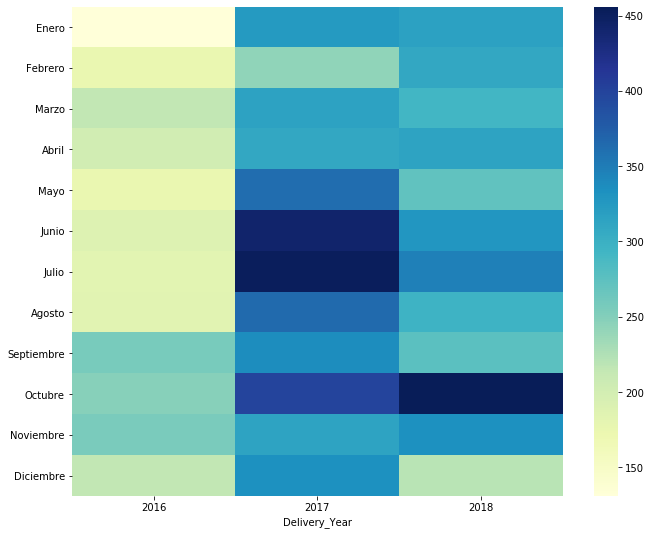

In [33]:
fig, ax = plt.subplots(figsize=(11, 9))
sns.heatmap(hmp, cmap='YlGnBu')
plt.show()

In [34]:
reduced = df[df.Stage=='Closed Won']
countries = reduced.groupby('Billing_Country').agg({'Total_Taxable_Amount_Converted':'sum'}).reset_index()

In [35]:
m = folium.Map(location=[37, -102], zoom_start=5)
 
# Add the color for the chloropleth:
m.choropleth(
 geo_data='world-countries.json',
 name='choropleth',
 data=countries,
 columns=['Billing_Country', 'Total_Taxable_Amount_Converted'],
 key_on='feature.properties.name',
 fill_color='YlGn',
 fill_opacity=0.7,
 line_opacity=0.2,
 legend_name='Total Taxable Amount per Country'
)
folium.LayerControl().add_to(m)

m.save('mapa.html')

/Users/agustinhejeij/opt/anaconda3/lib/python3.7/site-packages/folium/folium.py:415: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  FutureWarning


6009

68

9841

Text(0.5, 1.0, 'Top 10 vendedores que más oportunidades trabajaron')

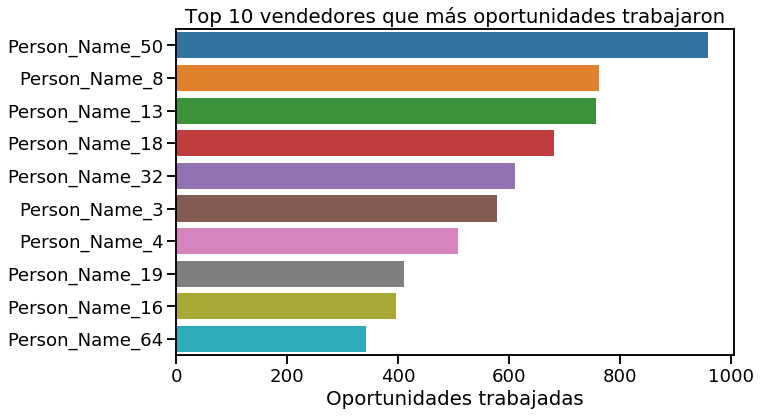

In [161]:
owners = df.groupby('Opportunity_Owner').agg({'Opportunity_ID':'nunique'}).reset_index()
top = owners.nlargest(10, 'Opportunity_ID')
low = owners.nsmallest(10, 'Opportunity_ID')
display(top.Opportunity_ID.sum())
display(low.Opportunity_ID.sum())
display(df.Opportunity_ID.nunique())
plt.figure(figsize=(10,6))
ax = sns.barplot(x='Opportunity_ID', y='Opportunity_Owner', data=top, orient='h')
plt.xlabel("Oportunidades trabajadas")
plt.ylabel("")
plt.title("Top 10 vendedores que más oportunidades trabajaron")

Text(0.5, 1.0, 'Top 10 vendedores que menos oportunidades trabajaron')

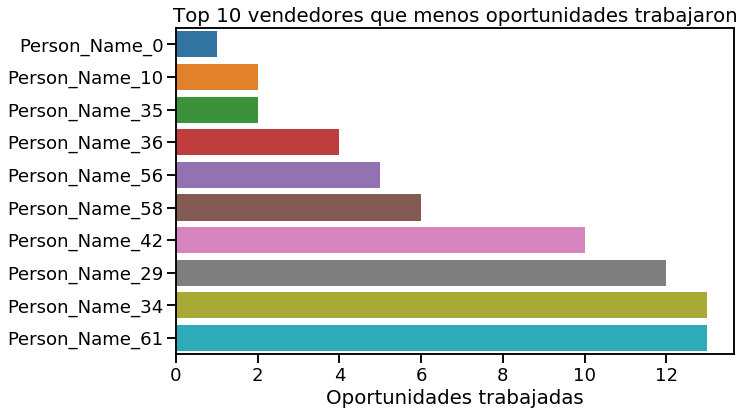

In [162]:
plt.figure(figsize=(10,6))
ax1 = sns.barplot(x='Opportunity_ID', y='Opportunity_Owner', data=low, orient='h')
plt.xlabel("Oportunidades trabajadas")
plt.ylabel("")
plt.title("Top 10 vendedores que menos oportunidades trabajaron")

In [137]:
df['Won'] = df.Stage=='Closed Won'
kk = df.drop_duplicates(subset='Opportunity_ID')
#owners['Pct_of_total_opp'] = owners.Opportunity_ID * 100 / df.Opportunity_ID.nunique()
owners1 = kk.groupby(['Opportunity_Owner', 'Won']).agg({'Opportunity_ID':'count', 'Total_Taxable_Amount_Converted':'sum'}).reset_index()#.unstack().fillna(0)
owners1['Total']= owners1.groupby('Opportunity_Owner')['Opportunity_ID'].transform('sum')
opps = df.Opportunity_ID.nunique()
owners1['Percentage_Participation']=owners1.Total * 100 / opps
#top = owners1.nlargest(30, 'Total')
#owners1['Average_Won']=owners1.Won * 100 / (owners1.Won + owners1['Not Won'])
#owners1['Total'] = owners1.Won + owners1['Not Won']
#owners1
filtered = owners1.loc[owners1.Won]
filtered['Average_Won'] = filtered['Opportunity_ID'] * 100/ filtered['Total']
filtered['Total_Taxable_Amount_Converted'] = filtered.Total_Taxable_Amount_Converted/1000000
#display(filtered)
final = filtered[filtered.Total_Taxable_Amount_Converted < 1000]
final=final.rename(columns={'Total_Taxable_Amount_Converted':'Dinero Facturado (MDD)'})
#sns.scatterplot(data=filtered, x="Percentage_Participation", y="Average_Won", size='Total_Taxable_Amount_Converted')
#g = sns.catplot(
#    data=top, kind="bar",
#    x="Opportunity_ID", y="Opportunity_Owner", hue="Won",
#    ci="sd", palette="dark", alpha=.6, height=6, orient='h'
#)
#g.despine(left=True)
#g.set_axis_labels("Opportunities", "Owners")
#g.legend.set_title("")

/Users/agustinhejeij/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]
/Users/agustinhejeij/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Text(0.5, 1.0, 'Distribución de oportunidades entre Vendedores y Oportunidades Ganadas')

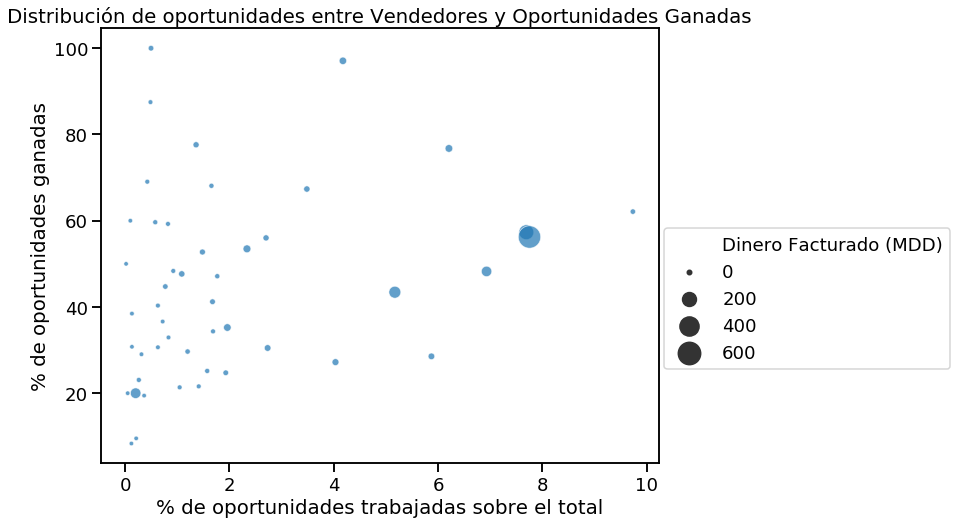

In [155]:
sns.set_context("talk", font_scale=1.1)
plt.figure(figsize=(10,8))
sns.scatterplot(x="Percentage_Participation", 
                y="Average_Won",
                size="Dinero Facturado (MDD)",            
                data=final, 
                sizes=(20,500),
                alpha=0.7,
                )
# Put the legend out of the figure
#plt.legend(bbox_to_anchor=(1.01, 1),borderaxespad=0)
# Put the legend out of the figure
plt.legend(bbox_to_anchor=(1.01, 0.54),  borderaxespad=0.)
plt.xlabel("% de oportunidades trabajadas sobre el total")
plt.ylabel("% de oportunidades ganadas")
plt.title('Distribución de oportunidades entre Vendedores y Oportunidades Ganadas')
#plt.set_label('Dinero Obtenido')
#plt.tight_layout()

#o = df.drop_duplicates(subset='Opportunity_ID')
#lista = o.Opportunity_Owner.to_list()
#string = ''.join(lista)

# Create the wordcloud object
#wordcloud = WordCloud(width=480, height=480, margin=0).generate(string)
 
# Display the generated image:
#plt.imshow(wordcloud, interpolation='bilinear')
#plt.axis("off")
#plt.margins(x=0, y=0)
#plt.show()
